In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def compute_rotation(distance: int, head_dim: int):
  theta_numerator = torch.arange(0, head_dim, 2).float()
  theta = 1.0 / (10000 ** (theta_numerator / head_dim))
  val = distance * theta
  return torch.polar(torch.ones_like(val), val)

def rotate_vector(x: torch.Tensor, rotation: torch.Tensor):
  x_complex = torch.view_as_complex(x.float().reshape(-1, 2))
  rotated = x_complex * rotation
  x_out = torch.view_as_real(rotated).reshape(x.shape)
  return x_out


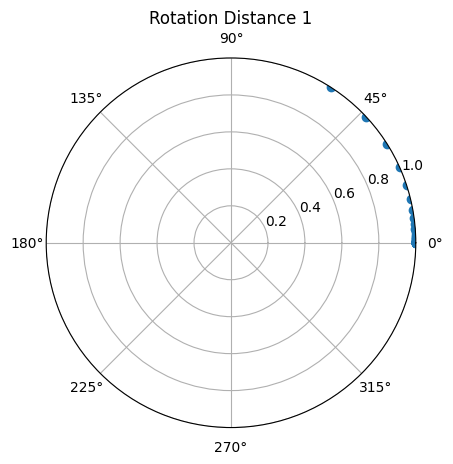

In [4]:
dim = 64

rotation_dist_1 = compute_rotation(1, dim)
rotation_dist_10 = compute_rotation(10, dim)

magnitude = np.abs(rotation_dist_1)
phase = np.angle(rotation_dist_1)

plt.figure()
ax = plt.subplot(111, polar=True)
ax.set_title("Rotation Distance 1")
ax.plot(phase, magnitude, 'o')

Text(0.5, 1.0, 'Rotation Distance 10')

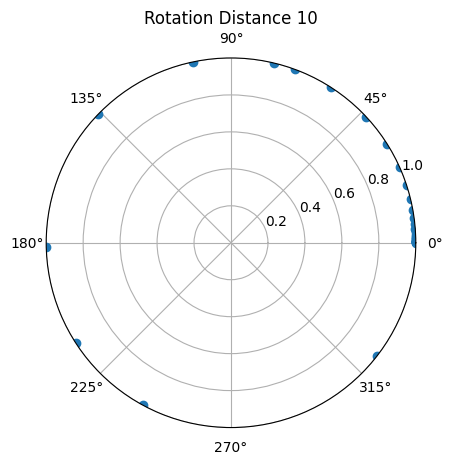

In [5]:
magnitude = np.abs(rotation_dist_10)
phase = np.angle(rotation_dist_10)

plt.figure()
ax = plt.subplot(111, polar=True)
ax.plot(phase, magnitude, 'o')
ax.set_title("Rotation Distance 10")

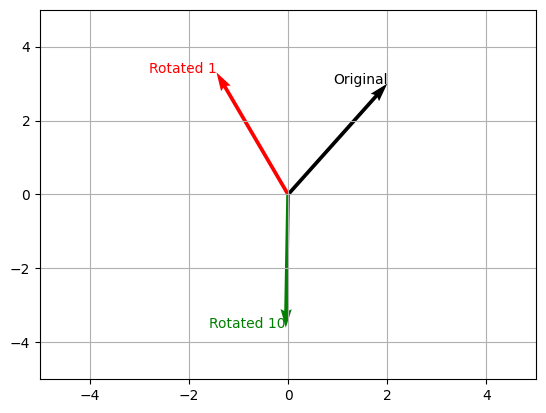

In [7]:
x = torch.tensor([2, 3], dtype=torch.float32)

dim = 2

rotation_dist_1 = compute_rotation(1, dim)
rotation_dist_10 = compute_rotation(10, dim)

x_rotated_1 = rotate_vector(x, rotation_dist_1)
x_rotated_10 = rotate_vector(x, rotation_dist_10)

plt.figure()
plt.text(x[0], x[1], 'Original', ha='right')
plt.text(x_rotated_1[0], x_rotated_1[1], 'Rotated 1', ha='right', color='r')
plt.text(x_rotated_10[0], x_rotated_10[1], 'Rotated 10', ha='right', color='g')
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, x_rotated_1[0], x_rotated_1[1], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver(0, 0, x_rotated_10[0], x_rotated_10[1], angles='xy', scale_units='xy', scale=1, color='g')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)
plt.show()